In [44]:
import pandas as pd

In [46]:
data=pd.read_csv('Groceries_dataset.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [169]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [50]:
# Install mixtend library
!pip install mlxtend

In [130]:
#Import necessary libraries
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<BarContainer object of 167 artists>

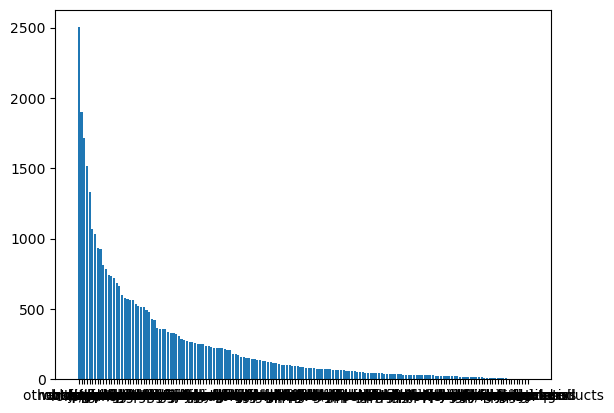

In [134]:
counts = data['itemDescription'].value_counts()
plt.bar(counts.index,counts.values)

<BarContainer object of 3898 artists>

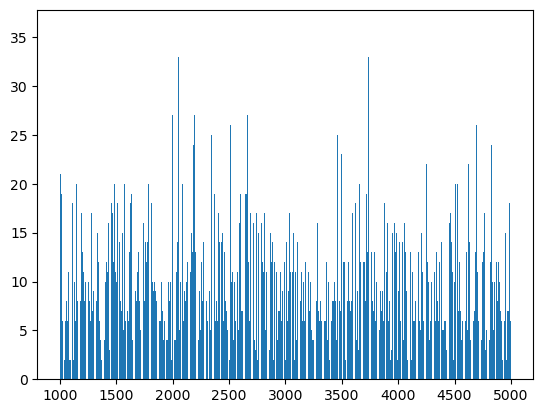

In [135]:
counts = data['Member_number'].value_counts()
plt.bar(counts.index,counts.values)

<BarContainer object of 728 artists>

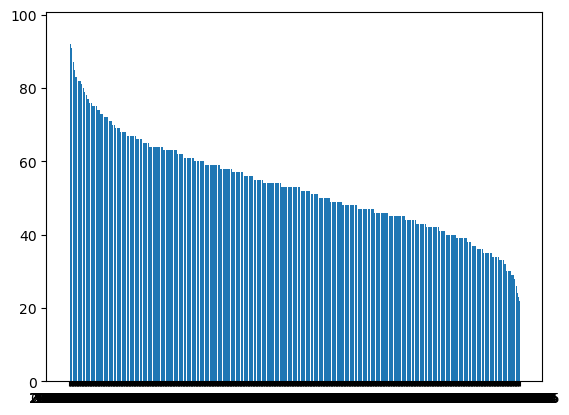

In [136]:
counts = data['Date'].value_counts()
plt.bar(counts.index,counts.values)

In [138]:
#perform one-hot encoding on categorical columns
df = pd.get_dummies(data,dtype=int)
df.head()

,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Columns: 896 entries, Member_number to itemDescription_zwieback
dtypes: int32(895), int64(1)
memory usage: 132.6 MB


In [147]:
df = df.astype(bool)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

    support                                     itemsets
0  1.000000                              (Member_number)
1  0.064543                 (itemDescription_whole milk)
2  0.064543  (Member_number, itemDescription_whole milk)


In [155]:
#Generate association rules with metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

C:\Users\bachu\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Member_number),(itemDescription_whole milk),1.000000,0.064543,0.064543,0.064543,1.0,1.0,0.0,1.0,0.0,0.064543,0.0,0.532271
1,(itemDescription_whole milk),(Member_number),0.064543,1.000000,0.064543,1.000000,1.0,1.0,0.0,inf,0.0,0.064543,0.0,0.532271


In [157]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Member_number),(itemDescription_whole milk),1.000000,0.064543,0.064543,0.064543,1.0,1.0,0.0,1.0,0.0,0.064543,0.0,0.532271
1,(itemDescription_whole milk),(Member_number),0.064543,1.000000,0.064543,1.000000,1.0,1.0,0.0,inf,0.0,0.064543,0.0,0.532271


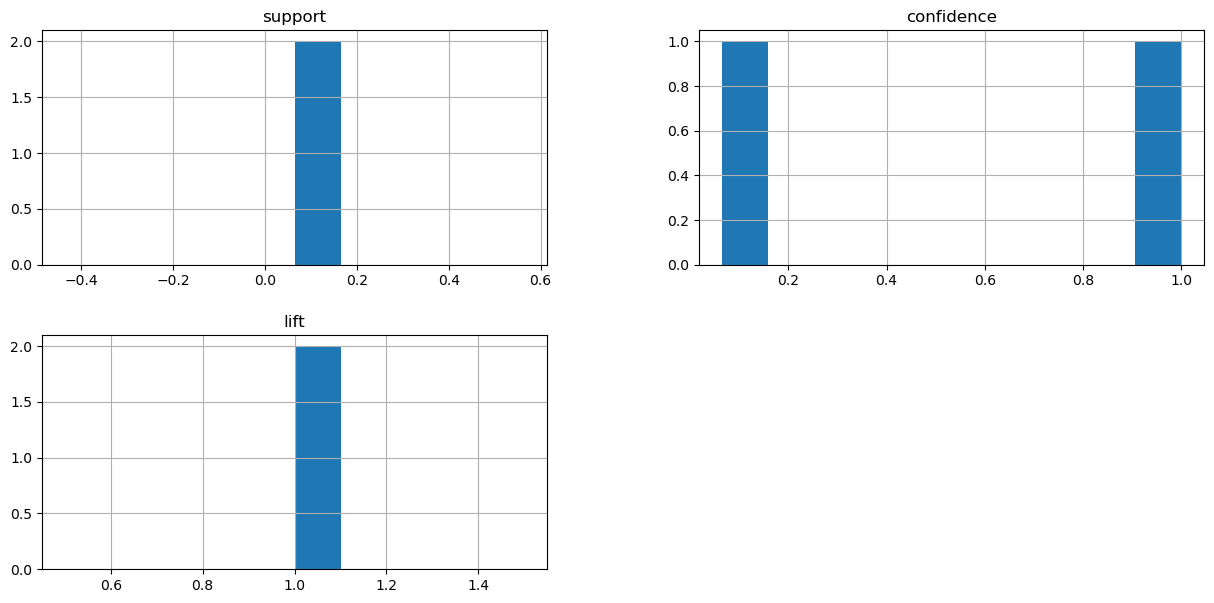

In [159]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [165]:
rules[rules["consequents"]== ({"Survived_Yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rules[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Support, Confidence, and Lift')
plt.show()

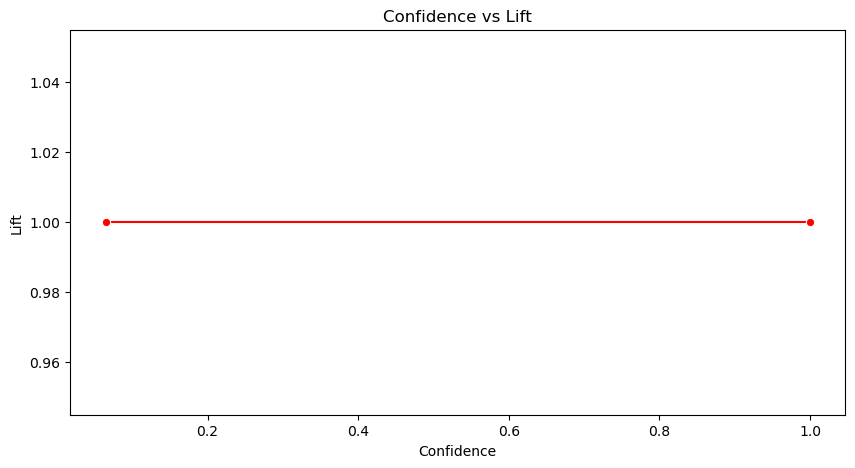

In [173]:
# Line Graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=rules['confidence'], y=rules['lift'], marker='o', color='red')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()

<Figure size 1000x500 with 0 Axes>

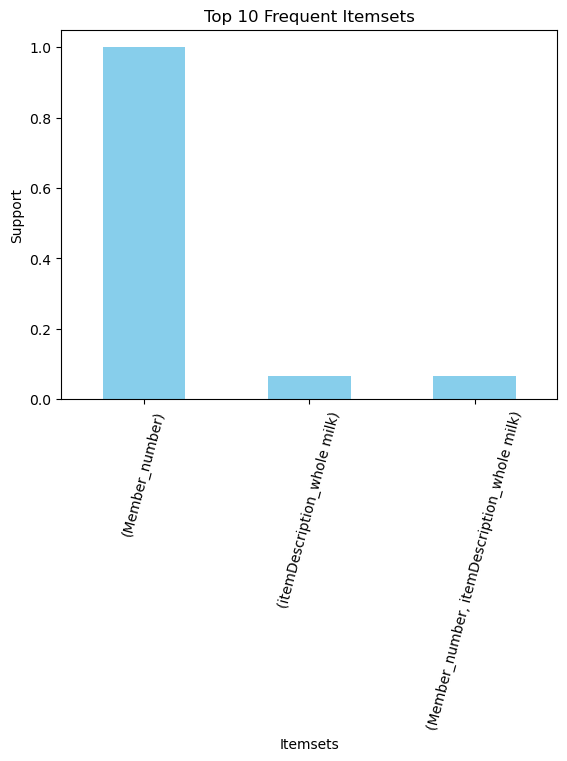

In [175]:
# Bar Graph
plt.figure(figsize=(10, 5))
frequent_itemsets.nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support', legend=False, color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=75)
plt.show()